In [2]:
import os
from pathlib import Path

os.chdir(Path.cwd().parent)
# print("cwd is now:", Path.cwd())

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
from datetime import datetime
from data_loader import scores_df
from fit import fit_statistical_model

null performances after coercion: 0
after saturation filter 2452
after filter num benchmarks 2021
after merge with model versions 2017
after date filter (>= 2022-11-01) 1783
after merge with benchmark dates 1783
Original number of rows: 1783
Number of rows after aggregation: 1306


In [4]:

import seaborn as sns
sns.set()
sns.set_style("whitegrid")

# Custom color palette
custom_colors = [
    '#00A5A6',  # teal
    '#E03D90',  # pink
    '#FC6538',  # orange
    '#6A3ECB',  # purple
    '#0058DC',  # blue
    '#EA8D00',  # yellow
    '#B087F4',  # lightPurple
    '#279E27',  # green
    '#009AF1',  # lightBlue
    '#015D90',  # darkBlue
    '#EA4831',  # red
    '#E1C700',  # yellow2
    '#46FFFF',  # turquoise
    '#63F039',  # lightGreen
]

sns.set_palette(custom_colors)
colors = sns.color_palette()

# === Seaborn global settings ===
sns.set_theme(
    style="whitegrid",        # or "darkgrid", "ticks", "white"
    palette=custom_colors,    # your custom color palette
    context="notebook"        # scaling for labels/titles ("paper", "notebook", "talk", "poster")
)

# === Matplotlib global settings (rcParams) ===
plt.rcParams.update({
    # Figure
    "figure.figsize": (8, 5),
    "figure.dpi": 120,
    
    # Axes
    "axes.titley": 1.02,
    "axes.titlesize": 14,
    "axes.titlelocation": 'center',
    "axes.titlepad": 0,
    "axes.labelsize": 12,
    "axes.labelpad": 10,           # spacing between axis and label
    "axes.spines.top": False,
    "axes.spines.right": False,
    
    # Ticks
    "xtick.labelsize": 10,
    "ytick.labelsize": 10,
    # tick marks size
    "xtick.major.size": 5,
    "ytick.major.size": 5,
    "xtick.labelsize": 12,
    "ytick.labelsize": 12,
    
    # tick visibility
    "xtick.top": False,
    "xtick.bottom": True,
    "ytick.left": True,
    "ytick.right": False,
    
    # Legend
    "legend.fontsize": 10,
    "legend.loc": "upper left",
    "legend.frameon": True,
    "legend.borderaxespad": 0,

    
    # Lines and markers
    "lines.linewidth": 2,
    "lines.markersize": 8,
    "lines.markeredgecolor": 'auto',   # white outline (stroke)
    "lines.markeredgewidth": 0.5,   
    # title alignment left
    

    
    
    # Error bars
    "errorbar.capsize": 3,
    
    # Font
    "font.family": "Arial",
    "font.sans-serif": ["DejaVu Sans"],
    
    # Grid
    "grid.alpha": 0.3,
    "grid.linestyle": "-",
    "grid.color": "lightgray",
})


In [5]:
anchor_mode = "model"  # "model", "benchmark"
anchor_benchmark = "Winogrande"
anchor_difficulty = 0
anchor_slope = 1
anchor_model1 = "claude-2.0"
anchor_model1_capability = 1.177630
anchor_model2 = "claude-3-opus-20240229"
anchor_model2_capability = 1.311554

df_anchor, df_cm_anchor, df_db_anchor = fit_statistical_model(
    scores_df,
    anchor_mode=anchor_mode,
    anchor_benchmark=anchor_benchmark,
    anchor_difficulty=anchor_difficulty,
    anchor_slope=anchor_slope,
    anchor_model1=anchor_model1,
    anchor_model1_capability=anchor_model1_capability,
    anchor_model2=anchor_model2,
    anchor_model2_capability=anchor_model2_capability,
)

df_cm_anchor["date_obj"] = pd.to_datetime(df_cm_anchor["date"])

# anchor_benchmark = "Winogrande"
# anchor_difficulty = 0
# anchor_slope = 1
# df_anchor, df_cm_anchor, df_db_anchor = fit_statistical_model(scores_df, anchor_benchmark, anchor_difficulty, anchor_slope)

# # Convert date strings to datetime objects
# df_cm_anchor['date_obj'] = pd.to_datetime(df_cm_anchor['date'])

`ftol` termination condition is satisfied.
Function evaluations 53, initial cost 4.8749e+01, final cost 3.5499e+00, first-order optimality 9.69e-05.


In [6]:
all_runs = {}  # will map benchmark_name -> dict of outputs
failed = []  # keep track of anything that errors out

# --- loop --------------------------------------------------------------------
for _, row in df_db_anchor.iterrows():
    anchor_benchmark = row["benchmark_name"]  # e.g. "HellaSwag"
    anchor_difficulty = float(row["estimated_difficulty"])
    anchor_slope = float(row["estimated_slope"])

    try:
        df, df_cm, df_db = fit_statistical_model(
            scores_df,
            anchor_mode="benchmark",
            anchor_benchmark=anchor_benchmark,
            anchor_difficulty=anchor_difficulty,
            anchor_slope=anchor_slope,
        )
        all_runs[anchor_benchmark] = {
            "df1": df,
            "df_cm1": df_cm,
            "df_db": df_db,
            # cache the anchor values for reference
            "anchor_difficulty": anchor_difficulty,
            "anchor_slope": anchor_slope,
        }
    except Exception as e:
        failed.append((anchor_benchmark, str(e)))

# --- post-processing (optional) ----------------------------------------------
# 1) quick glance at what failed
if failed:
    print("Benchmarks that raised errors:", failed)

# 2) pull out the difficulty/slope re-estimates across all runs
summary = pd.concat(
    {
        k: v["df_db"][["benchmark_name", "estimated_difficulty", "estimated_slope"]]
        for k, v in all_runs.items()
    },
    names=["anchor_benchmark"],
).reset_index(level=0)

`ftol` termination condition is satisfied.
Function evaluations 32, initial cost 4.5298e+01, final cost 3.4903e+00, first-order optimality 5.84e-04.
`ftol` termination condition is satisfied.
Function evaluations 31, initial cost 4.5428e+01, final cost 3.4901e+00, first-order optimality 6.05e-04.
`ftol` termination condition is satisfied.
Function evaluations 32, initial cost 4.5379e+01, final cost 3.4899e+00, first-order optimality 4.88e-04.
`ftol` termination condition is satisfied.
Function evaluations 32, initial cost 4.5470e+01, final cost 3.4908e+00, first-order optimality 2.31e-04.
`ftol` termination condition is satisfied.
Function evaluations 29, initial cost 4.5228e+01, final cost 3.4910e+00, first-order optimality 7.92e-04.
`ftol` termination condition is satisfied.
Function evaluations 32, initial cost 4.5456e+01, final cost 3.4910e+00, first-order optimality 3.37e-04.
`ftol` termination condition is satisfied.
Function evaluations 31, initial cost 4.5414e+01, final cost 3.

In [7]:
import pandas as pd
import numpy as np

# ---------------------------------------------------------------------------
# 1)  DIFFICULTY  ––  variation of each benchmark’s difficulty estimate
# ---------------------------------------------------------------------------
difficulty_rows = []

for anchor, run in all_runs.items():
    df_db = run["df_db"]  # difficulty table from that fit
    out = df_db[["benchmark_name", "estimated_difficulty"]].copy()
    out["anchor_benchmark"] = anchor  # remember which fit this came from
    difficulty_rows.append(out)

difficulty_long = pd.concat(difficulty_rows, ignore_index=True)

# drop the trivial row where the benchmark was forced to be the anchor (always fixed):
difficulty_long = difficulty_long[
    difficulty_long["benchmark_name"] != difficulty_long["anchor_benchmark"]
]

difficulty_stats = (
    difficulty_long.groupby("benchmark_name")["estimated_difficulty"]
    .agg(
        mean="mean",
        std="std",
        min="min",
        max="max",
        cv=lambda s: s.std(ddof=0) / s.mean(),  # coefficient of variation
    )
    .sort_index()
)

# ---------------------------------------------------------------------------
# 2)  CAPABILITY  ––  variation of each model’s capability estimate
# ---------------------------------------------------------------------------
capability_rows = []

for anchor, run in all_runs.items():
    df_cm = run["df_cm1"]  # capability table from that fit
    out = df_cm[["model", "estimated_capability"]].copy()
    out["anchor_benchmark"] = anchor
    capability_rows.append(out)

capability_long = pd.concat(capability_rows, ignore_index=True)

capability_stats = (
    capability_long.groupby("model")["estimated_capability"]
    .agg(
        mean="mean",
        std="std",
        min="min",
        max="max",
        cv=lambda s: s.std(ddof=0) / s.mean(),
    )
    .sort_index()
)

# ---------------------------------------------------------------------------
# 3)  quick look
# ---------------------------------------------------------------------------
print("=== variation in benchmark difficulties ===")
display(difficulty_stats)

print("\n=== variation in model capabilities ===")
display(capability_stats)

=== variation in benchmark difficulties ===


,mean,std,min,max,cv
benchmark_name,,,,,
ANLI,0.725043,0.049622,0.622954,0.797447,0.067533
ARC AI2,0.072113,0.078011,-0.055982,0.178222,1.067455
ARC-AGI,2.040985,0.035474,1.942866,2.116894,0.017150
Aider polyglot,1.766796,0.034349,1.666368,1.829311,0.019184
BBH,0.378204,0.063937,0.267554,0.468070,0.166814
Balrog,2.407985,0.040116,2.312863,2.504557,0.016439
BoolQ,-1.196570,0.145638,-1.478440,-1.022539,-0.120101
CadEval,1.799740,0.034374,1.699628,1.863753,0.018846
Cybench,2.723564,0.041442,2.630750,2.824448,0.015014



=== variation in model capabilities ===


,mean,std,min,max,cv
model,,,,,
Baichuan-2-13B-Base,0.296063,0.067859,0.186250,0.392318,0.226247
Baichuan-2-7B-Base,-0.050632,0.085312,-0.183750,0.065290,-1.663202
Baichuan-7B,-0.220527,0.094363,-0.376607,-0.094871,-0.422376
Cerebras-GPT-13B,-0.546602,0.112655,-0.744687,-0.402383,-0.203442
CodeQwen1.5-7B,0.000003,0.082948,-0.131183,0.113001,29056.801948
...,...,...,...,...,...
starcoder2-3b,-0.256101,0.096407,-0.417102,-0.128495,-0.371585
starcoder2-7b,-0.054446,0.085793,-0.191930,0.061664,-1.555397
text-davinci-003,0.829792,0.045638,0.728565,0.895812,0.054290


In [8]:
# ---------------------------------------------------------------------------
# 4)  Rank correlation across fits (Spearman) for difficulties and capabilities
#     Robust to duplicates and missing values
# ---------------------------------------------------------------------------


def _spearman_corr_from_long(
    df_long: pd.DataFrame, index_col: str, columns_col: str, values_col: str
) -> pd.DataFrame:
    # Allow duplicates by aggregating with mean; coerce to numeric in case of stray dtypes
    wide = df_long.pivot_table(
        index=index_col,
        columns=columns_col,
        values=values_col,
        aggfunc="mean",
    )
    wide = wide.apply(pd.to_numeric, errors="coerce")

    # Drop rows that are entirely NaN
    wide = wide.dropna(axis=0, how="all")

    # Need at least two fits (columns) to compute a correlation matrix
    if wide.shape[1] < 2:
        return pd.DataFrame()

    # Compute Spearman by ranking then applying Pearson correlation
    ranks = wide.rank(axis=0, method="average", na_option="keep")
    corr = ranks.corr(method="pearson", min_periods=2)
    return corr


print("=== Spearman rank correlation across fits (benchmark difficulties) ===")
spearman_difficulty = _spearman_corr_from_long(
    difficulty_long,
    index_col="benchmark_name",
    columns_col="anchor_benchmark",
    values_col="estimated_difficulty",
)
if spearman_difficulty.empty:
    print("Not enough comparable fits to compute correlations for difficulties.")
else:
    display(spearman_difficulty)
    mean_rho_difficulty = (
        spearman_difficulty.apply(lambda s: s.drop(labels=s.name).mean(), axis=0)
        .sort_values(ascending=False)
        .to_frame("mean_rho")
    )
    print("\nMean off-diagonal Spearman per fit (difficulties):")
    display(mean_rho_difficulty)

print("\n=== Spearman rank correlation across fits (model capabilities) ===")
spearman_capability = _spearman_corr_from_long(
    capability_long,
    index_col="model",
    columns_col="anchor_benchmark",
    values_col="estimated_capability",
)
if spearman_capability.empty:
    print("Not enough comparable fits to compute correlations for capabilities.")
else:
    display(spearman_capability)
    mean_rho_capability = (
        spearman_capability.apply(lambda s: s.drop(labels=s.name).mean(), axis=0)
        .sort_values(ascending=False)
        .to_frame("mean_rho")
    )
    print("\nMean off-diagonal Spearman per fit (capabilities):")
    display(mean_rho_capability)

=== Spearman rank correlation across fits (benchmark difficulties) ===


anchor_benchmark,ANLI,ARC AI2,ARC-AGI,Aider polyglot,BBH,Balrog,BoolQ,CadEval,Cybench,DeepResearch Bench,...,SWE-Bench verified,ScienceQA,SimpleBench,Terminal Bench,The Agent Company,TriviaQA,VPCT,VideoMME,WeirdML,Winogrande
anchor_benchmark,,,,,,,,,,,,,,,,,,,,,
ANLI,1.000000,0.999406,0.999198,0.999451,0.999452,0.999071,0.999021,0.999312,0.999202,0.999528,...,0.999151,0.999353,0.999085,0.999096,0.999062,0.999370,0.999067,0.999470,0.999113,0.999000
ARC AI2,0.999406,1.000000,0.998812,0.998974,0.999712,0.998768,0.999673,0.998884,0.999074,0.999024,...,0.998784,0.999798,0.998749,0.998800,0.998750,0.999615,0.998744,0.999575,0.998763,0.999728
ARC-AGI,0.999198,0.998812,1.000000,0.999701,0.998665,0.999571,0.998820,0.999894,0.999483,0.999613,...,1.000000,0.998631,0.999796,0.999523,0.999633,0.999302,0.999709,0.999071,0.999894,0.998733
Aider polyglot,0.999451,0.998974,0.999701,1.000000,0.998881,0.999346,0.998894,0.999894,0.999367,1.000000,...,0.999616,0.998828,0.999473,0.999334,0.999375,0.999352,0.999418,0.999186,0.999539,0.998820
BBH,0.999452,0.999712,0.998665,0.998881,1.000000,0.998575,0.999519,0.998762,0.998874,0.998947,...,0.998627,1.000000,0.998574,0.998604,0.998562,0.999368,0.998562,0.999133,0.998596,0.999519
Balrog,0.999071,0.998768,0.999571,0.999346,0.998575,1.000000,0.998790,0.999450,0.999804,0.999299,...,0.999639,0.998558,0.999799,1.000000,1.000000,0.999260,0.999894,0.999050,0.999715,0.998707
BoolQ,0.999021,0.999673,0.998820,0.998894,0.999519,0.998790,1.000000,0.998856,0.999073,0.998913,...,0.998804,0.999548,0.998781,0.998811,0.998779,0.999660,0.998777,0.999347,0.998791,1.000000
CadEval,0.999312,0.998884,0.999894,0.999894,0.998762,0.999450,0.998856,1.000000,0.999420,0.999793,...,0.999795,0.998719,0.999623,0.999422,0.999494,0.999329,0.999553,0.999123,0.999704,0.998774
Cybench,0.999202,0.999074,0.999483,0.999367,0.998874,0.999804,0.999073,0.999420,1.000000,0.999341,...,0.999519,0.998860,0.999608,0.999894,0.999728,0.999527,0.999663,0.999187,0.999560,0.998997



Mean off-diagonal Spearman per fit (difficulties):


,mean_rho
anchor_benchmark,
OSUniverse,0.999616
PIQA,0.999526
GSO-Bench,0.999515
FrontierMath-Tier-4-2025-07-01-Private,0.999436
LAMBADA,0.999436
TriviaQA,0.999424
Fiction.LiveBench,0.999393
DeepResearch Bench,0.999392
LiveBench,0.999392



=== Spearman rank correlation across fits (model capabilities) ===


anchor_benchmark,ANLI,ARC AI2,ARC-AGI,Aider polyglot,BBH,Balrog,BoolQ,CadEval,Cybench,DeepResearch Bench,...,SWE-Bench verified,ScienceQA,SimpleBench,Terminal Bench,The Agent Company,TriviaQA,VPCT,VideoMME,WeirdML,Winogrande
anchor_benchmark,,,,,,,,,,,,,,,,,,,,,
ANLI,1.000000,0.999741,0.999985,0.999968,0.999714,0.999995,0.999932,0.999998,0.999998,0.999995,...,0.999980,0.999971,0.999985,0.999988,0.999995,0.999980,1.000000,0.999995,0.999995,0.999770
ARC AI2,0.999741,1.000000,0.999724,0.999753,0.999976,0.999734,0.999905,0.999739,0.999739,0.999719,...,0.999719,0.999812,0.999746,0.999726,0.999719,0.999766,0.999741,0.999719,0.999758,0.999983
ARC-AGI,0.999985,0.999724,1.000000,0.999958,0.999697,0.999985,0.999917,0.999988,0.999983,0.999985,...,0.999980,0.999956,0.999968,0.999978,0.999985,0.999966,0.999985,0.999985,0.999980,0.999753
Aider polyglot,0.999968,0.999753,0.999958,1.000000,0.999726,0.999968,0.999927,0.999966,0.999971,0.999966,...,0.999958,0.999956,0.999980,0.999966,0.999966,0.999958,0.999968,0.999966,0.999973,0.999780
BBH,0.999714,0.999976,0.999697,0.999726,1.000000,0.999707,0.999888,0.999712,0.999712,0.999692,...,0.999692,0.999785,0.999719,0.999700,0.999692,0.999758,0.999714,0.999692,0.999731,0.999980
Balrog,0.999995,0.999734,0.999985,0.999968,0.999707,1.000000,0.999927,0.999993,0.999993,0.999995,...,0.999980,0.999966,0.999978,0.999988,0.999995,0.999976,0.999995,0.999995,0.999990,0.999763
BoolQ,0.999932,0.999905,0.999917,0.999927,0.999888,0.999927,1.000000,0.999929,0.999929,0.999922,...,0.999912,0.999963,0.999929,0.999919,0.999922,0.999936,0.999932,0.999922,0.999939,0.999927
CadEval,0.999998,0.999739,0.999988,0.999966,0.999712,0.999993,0.999929,1.000000,0.999995,0.999993,...,0.999983,0.999968,0.999983,0.999985,0.999993,0.999978,0.999998,0.999993,0.999993,0.999768
Cybench,0.999998,0.999739,0.999983,0.999971,0.999712,0.999993,0.999929,0.999995,1.000000,0.999993,...,0.999983,0.999968,0.999983,0.999990,0.999993,0.999978,0.999998,0.999993,0.999993,0.999768



Mean off-diagonal Spearman per fit (capabilities):


,mean_rho
anchor_benchmark,
PIQA,0.999948
WeirdML,0.999945
ANLI,0.999945
OSWorld,0.999945
Lech Mazur Writing,0.999945
FrontierMath-2025-02-28-Private,0.999945
VPCT,0.999945
Factorio learning environment,0.999943
Cybench,0.999943


In [9]:
all_runs = {}  # will map model_pair -> dict of outputs
failed = []  # keep track of anything that errors out

# --- Create model pairs for anchoring -------------------------------------
# Get unique models with their estimated capabilities
models_with_capability = df_cm_anchor[
    ["model", "estimated_capability"]
].drop_duplicates()
models_list = models_with_capability.to_dict("records")

# Create pairs of models to use as anchors
# You can adjust this logic based on your needs
model_pairs = []
for i in range(len(models_list) - 1):
    # Each model paired with the next one
    model_pairs.append((models_list[i], models_list[i + 1]))

# Alternatively, you could pair each model with a fixed reference model:
# reference_model = models_list[0]  # or find a specific model
# model_pairs = [(reference_model, model) for model in models_list[1:]]

# --- loop over model pairs ------------------------------------------------
for model1_info, model2_info in model_pairs:
    anchor_model1 = model1_info["model"]
    anchor_model1_capability = float(model1_info["estimated_capability"])
    anchor_model2 = model2_info["model"]
    anchor_model2_capability = float(model2_info["estimated_capability"])

    # Create a key for storing results
    pair_key = f"{anchor_model1}_{anchor_model2}"

    try:
        df, df_cm, df_db = fit_statistical_model(
            scores_df,
            anchor_mode="model",
            anchor_benchmark=anchor_benchmark,  # Keep the same benchmark
            anchor_difficulty=anchor_difficulty,  # Keep the same difficulty
            anchor_slope=anchor_slope,  # Keep the same slope
            anchor_model1=anchor_model1,
            anchor_model1_capability=anchor_model1_capability,
            anchor_model2=anchor_model2,
            anchor_model2_capability=anchor_model2_capability,
        )

        all_runs[pair_key] = {
            "df1": df,
            "df_cm1": df_cm,
            "df_db": df_db,
            # cache the anchor values for reference
            "anchor_model1": anchor_model1,
            "anchor_model1_capability": anchor_model1_capability,
            "anchor_model2": anchor_model2,
            "anchor_model2_capability": anchor_model2_capability,
        }
    except Exception as e:
        failed.append((pair_key, str(e)))

# --- post-processing (optional) ----------------------------------------------
# 1) quick glance at what failed
if failed:
    print("Model pairs that raised errors:", failed)

# 2) pull out the model capability estimates across all runs
summary_models = pd.concat(
    {k: v["df_cm1"][["model", "estimated_capability"]] for k, v in all_runs.items()},
    names=["anchor_model_pair"],
).reset_index(level=0)

# 3) pull out the benchmark difficulty/slope estimates across all runs
summary_benchmarks = pd.concat(
    {
        k: v["df_db"][["benchmark_name", "estimated_difficulty", "estimated_slope"]]
        for k, v in all_runs.items()
    },
    names=["anchor_model_pair"],
).reset_index(level=0)

print(f"Processed {len(all_runs)} model pair combinations")
print(f"Failed: {len(failed)} combinations")

`ftol` termination condition is satisfied.
Function evaluations 44, initial cost 4.8400e+01, final cost 3.5160e+00, first-order optimality 1.46e-04.
`ftol` termination condition is satisfied.
Function evaluations 29, initial cost 4.8698e+01, final cost 3.5189e+00, first-order optimality 2.71e-04.
`ftol` termination condition is satisfied.
Function evaluations 32, initial cost 4.8166e+01, final cost 3.5215e+00, first-order optimality 1.30e-04.
`ftol` termination condition is satisfied.
Function evaluations 36, initial cost 4.8335e+01, final cost 3.5233e+00, first-order optimality 1.65e-04.
`ftol` termination condition is satisfied.
Function evaluations 36, initial cost 4.8702e+01, final cost 3.5239e+00, first-order optimality 5.62e-05.
`ftol` termination condition is satisfied.
Function evaluations 38, initial cost 4.8765e+01, final cost 3.5246e+00, first-order optimality 2.31e-04.
`ftol` termination condition is satisfied.
Function evaluations 39, initial cost 4.8954e+01, final cost 3.

KeyboardInterrupt: 

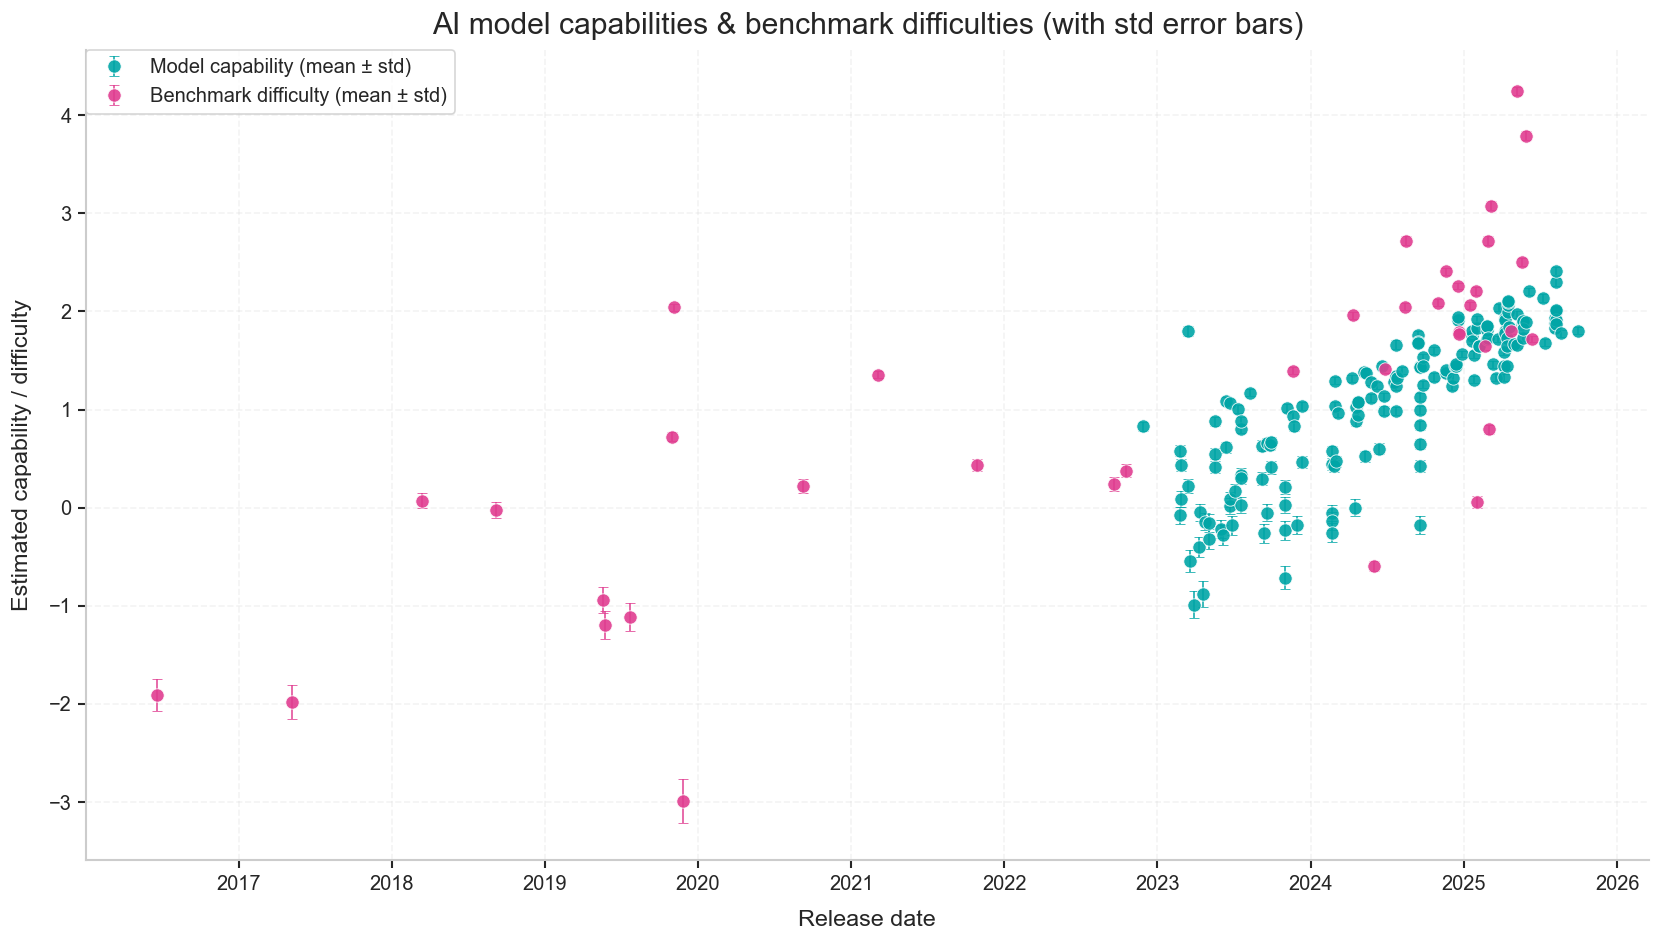

In [16]:
# Capabilities and difficulties over time with std error bars (from variation tables)
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

# Expect these to exist from earlier cells:
# - capability_stats: index=model, columns include ['mean','std']
# - difficulty_stats: index=benchmark_name, columns include ['mean','std']
# - df_cm_anchor: per-model table with 'model' and 'date' (string) or 'date_obj'
# - df_db_anchor: per-benchmark table with 'benchmark_name' and 'benchmark_release_date'

# Merge stats with model release dates
cap_stats_df = capability_stats.reset_index()  # 'model', 'mean', 'std', ...
model_dates = df_cm_anchor[["model", "date"]].drop_duplicates(subset=["model"]).copy()
model_dates["date_obj"] = pd.to_datetime(model_dates["date"], errors="coerce")
cap_plot_df = (
    cap_stats_df.merge(model_dates, on="model", how="left")
    .dropna(subset=["date_obj", "mean"])  # require a date and mean
    .sort_values("date_obj")
)
cap_plot_df["std"] = cap_plot_df["std"].fillna(0.0)

# Merge stats with benchmark release dates
diff_stats_df = difficulty_stats.reset_index()  # 'benchmark_name', 'mean', 'std', ...
bench_dates = (
    df_db_anchor[["benchmark_name", "benchmark_release_date"]]
    .drop_duplicates(subset=["benchmark_name"])
    .copy()
)
bench_dates["benchmark_release_date"] = pd.to_datetime(
    bench_dates["benchmark_release_date"], errors="coerce"
)
diff_plot_df = (
    diff_stats_df.merge(bench_dates, on="benchmark_name", how="left")
    .dropna(subset=["benchmark_release_date", "mean"])  # require a date and mean
    .sort_values("benchmark_release_date")
)
diff_plot_df["std"] = diff_plot_df["std"].fillna(0.0)

# Plot
fig, ax = plt.subplots(figsize=(14, 8))

ax.errorbar(
    cap_plot_df["date_obj"],
    cap_plot_df["mean"],
    yerr=cap_plot_df["std"],
    fmt="o",
    color=colors[0],
    ecolor=colors[0],
    markeredgecolor='white',

    elinewidth=1,
    capsize=3,
    alpha=0.9,
    label="Model capability (mean ± std)",
)

ax.errorbar(
    diff_plot_df["benchmark_release_date"],
    diff_plot_df["mean"],
    yerr=diff_plot_df["std"],
    fmt="o",
    color=colors[1],
    ecolor=colors[1],
    markeredgecolor='white',
    elinewidth=1,
    capsize=3,
    alpha=0.9,
    label="Benchmark difficulty (mean ± std)",
)

ax.set_xlabel("Release date", fontsize=14)
ax.set_ylabel("Estimated capability / difficulty", fontsize=14)
ax.set_title(
    "AI model capabilities & benchmark difficulties (with std error bars)", fontsize=18
)

ax.xaxis.set_major_formatter(mdates.DateFormatter("%Y"))
ax.xaxis.set_major_locator(mdates.YearLocator())
# fig.autofmt_xdate()

ax.grid(True, alpha=0.25, linestyle="--")
ax.legend(frameon=True, fontsize=12)

plt.tight_layout()
# plt.savefig("outputs/change_anchor/capabilities_and_benchmarks_over_time.pdf")
plt.show()

In [ ]:
# ---------------------------------------------------------------------------
# 1)  DIFFICULTY  ––  variation of each benchmark's difficulty estimate
#     across different model anchor pairs
# ---------------------------------------------------------------------------
difficulty_rows = []

for anchor_pair, run in all_runs.items():
    df_db = run["df_db"]  # difficulty table from that fit
    out = df_db[["benchmark_name", "estimated_difficulty"]].copy()
    out["anchor_model_pair"] = anchor_pair  # remember which model pair this came from
    # Also store the individual models for more detailed analysis if needed
    out["anchor_model1"] = run["anchor_model1"]
    out["anchor_model2"] = run["anchor_model2"]
    difficulty_rows.append(out)

difficulty_long = pd.concat(difficulty_rows, ignore_index=True)

# No need to drop trivial rows since we're not anchoring on benchmarks
# All benchmark estimates are free to vary

difficulty_stats = (
    difficulty_long.groupby("benchmark_name")["estimated_difficulty"]
    .agg(
        mean="mean",
        std="std",
        min="min",
        max="max",
        count="count",  # how many model pairs estimated this
        cv=lambda s: s.std(ddof=0) / s.mean() if s.mean() != 0 else np.nan,
    )
    .sort_index()
)

# ---------------------------------------------------------------------------
# 2)  CAPABILITY  ––  variation of each model's capability estimate
#     across different model anchor pairs
# ---------------------------------------------------------------------------
capability_rows = []

for anchor_pair, run in all_runs.items():
    df_cm = run["df_cm1"]  # capability table from that fit
    # Check the actual column name - might be 'model' or 'model_name'
    model_col = "model_name" if "model_name" in df_cm.columns else "model"
    out = df_cm[[model_col, "estimated_capability"]].copy()
    out.rename(columns={model_col: "model"}, inplace=True)  # standardize column name
    out["anchor_model_pair"] = anchor_pair
    # Also store the individual anchor models
    out["anchor_model1"] = run["anchor_model1"]
    out["anchor_model2"] = run["anchor_model2"]
    capability_rows.append(out)

capability_long = pd.concat(capability_rows, ignore_index=True)

# For model capabilities, we might want to exclude rows where the model
# was one of the anchors (since those were fixed)
capability_long_free = capability_long[
    (capability_long["model"] != capability_long["anchor_model1"])
    & (capability_long["model"] != capability_long["anchor_model2"])
]

# Stats for all models (including anchored ones)
capability_stats_all = (
    capability_long.groupby("model")["estimated_capability"]
    .agg(
        mean="mean",
        std="std",
        min="min",
        max="max",
        count="count",
        cv=lambda s: s.std(ddof=0) / s.mean() if s.mean() != 0 else np.nan,
    )
    .sort_index()
)

# Stats for non-anchored models only (more meaningful variation)
capability_stats_free = (
    capability_long_free.groupby("model")["estimated_capability"]
    .agg(
        mean="mean",
        std="std",
        min="min",
        max="max",
        count="count",
        cv=lambda s: s.std(ddof=0) / s.mean() if s.mean() != 0 else np.nan,
    )
    .sort_index()
)

# ---------------------------------------------------------------------------
# 3)  SLOPE  ––  variation of each benchmark's slope estimate
# ---------------------------------------------------------------------------
slope_rows = []

for anchor_pair, run in all_runs.items():
    df_db = run["df_db"]
    out = df_db[["benchmark_name", "estimated_slope"]].copy()
    out["anchor_model_pair"] = anchor_pair
    slope_rows.append(out)

slope_long = pd.concat(slope_rows, ignore_index=True)

slope_stats = (
    slope_long.groupby("benchmark_name")["estimated_slope"]
    .agg(
        mean="mean",
        std="std",
        min="min",
        max="max",
        count="count",
        cv=lambda s: s.std(ddof=0) / s.mean() if s.mean() != 0 else np.nan,
    )
    .sort_index()
)

# ---------------------------------------------------------------------------
# 4)  Quick look at results
# ---------------------------------------------------------------------------
print("=== Variation in benchmark difficulties across model anchor pairs ===")
display(difficulty_stats)

print("\n=== Variation in benchmark slopes across model anchor pairs ===")
display(slope_stats)

print("\n=== Variation in model capabilities (all models) ===")
display(capability_stats_all)

print("\n=== Variation in model capabilities (excluding anchored models) ===")
display(capability_stats_free)

# ---------------------------------------------------------------------------
# 5)  Additional analysis: which model pairs give most stable estimates?
# ---------------------------------------------------------------------------
# Calculate overall stability metric for each model pair
stability_by_pair = {}

for anchor_pair in all_runs.keys():
    # Get difficulty variations for this pair
    diff_subset = difficulty_long[difficulty_long["anchor_model_pair"] == anchor_pair]
    cap_subset = capability_long_free[
        capability_long_free["anchor_model_pair"] == anchor_pair
    ]

    # Calculate average deviation from overall means
    diff_devs = []
    for bench in diff_subset["benchmark_name"].unique():
        estimate = diff_subset[diff_subset["benchmark_name"] == bench][
            "estimated_difficulty"
        ].iloc[0]
        overall_mean = difficulty_stats.loc[bench, "mean"]
        diff_devs.append(abs(estimate - overall_mean))

    cap_devs = []
    for model in cap_subset["model"].unique():
        if model in capability_stats_free.index:
            estimate = cap_subset[cap_subset["model"] == model][
                "estimated_capability"
            ].iloc[0]
            overall_mean = capability_stats_free.loc[model, "mean"]
            cap_devs.append(abs(estimate - overall_mean))

    stability_by_pair[anchor_pair] = {
        "mean_difficulty_deviation": np.mean(diff_devs) if diff_devs else np.nan,
        "mean_capability_deviation": np.mean(cap_devs) if cap_devs else np.nan,
        "combined_deviation": (
            np.mean(diff_devs + cap_devs) if (diff_devs or cap_devs) else np.nan
        ),
    }

stability_df = pd.DataFrame(stability_by_pair).T.sort_values("combined_deviation")

print("\n=== Model pair stability (lower deviation = more stable) ===")
display(stability_df.head(10))  # Show top 10 most stable pairs

=== Variation in benchmark difficulties across model anchor pairs ===


,mean,std,min,max,count,cv
benchmark_name,,,,,,
ANLI,0.576904,0.171304,0.148446,0.853594,149,0.295938
ARC AI2,-0.031989,0.221886,-0.572622,0.263367,149,-6.913003
ARC-AGI,1.948494,0.273432,1.213769,2.212920,149,0.139858
Aider polyglot,1.614525,0.237116,0.937043,1.854031,149,0.146371
BBH,0.324886,0.180106,-0.148678,0.584454,149,0.552502
Balrog,2.368297,0.332024,1.558319,2.714604,149,0.139724
BoolQ,-1.218257,0.447152,-2.080091,-0.602495,149,-0.365809
CSQA2,-0.329824,0.161517,-0.760793,-0.125501,149,-0.488062
CadEval,1.653583,0.240238,0.970420,1.892235,149,0.144795



=== Variation in benchmark slopes across model anchor pairs ===


,mean,std,min,max,count,cv
benchmark_name,,,,,,
ANLI,0.949958,0.247404,0.676248,1.395438,149,0.259561
ARC AI2,1.511995,0.411552,1.070354,2.288111,149,0.271277
ARC-AGI,4.478621,0.708559,2.984404,5.299933,149,0.157677
Aider polyglot,3.244570,0.554589,2.250287,3.901585,149,0.170354
BBH,1.433160,0.386742,0.993533,2.153350,149,0.268945
Balrog,1.090131,0.187621,0.755459,1.317417,149,0.171531
BoolQ,1.008272,0.274833,0.720922,1.546536,149,0.271662
CSQA2,0.326550,0.048583,0.255513,0.427432,149,0.148275
CadEval,2.272964,0.388145,1.568320,2.734986,149,0.170192



=== Variation in model capabilities (all models) ===


,mean,std,min,max,count,cv
model,,,,,,
Baichuan-2-13B-Base,0.022723,0.215473,-0.510097,0.304139,149,9.450721
Baichuan-2-7B-Base,-0.163597,0.243944,-0.731591,0.166295,149,-1.486114
Cerebras-GPT-13B,-0.587071,0.319552,-1.252025,-0.146496,149,-0.542487
Chinchilla (70B),0.474530,0.172668,0.028658,0.738817,149,0.362649
DeepSeek-R1,1.647710,0.240956,0.963706,1.887455,149,0.145745
...,...,...,...,...,...,...
stablelm-tuned-alpha-7b,-0.880515,0.377027,-1.638438,-0.363670,149,-0.426750
text-davinci-001,0.011444,0.215855,-0.521015,0.295527,149,18.798225
text-davinci-002,0.743699,0.174332,0.279800,1.019313,149,0.233624



=== Variation in model capabilities (excluding anchored models) ===


,mean,std,min,max,count,cv
model,,,,,,
Baichuan-2-13B-Base,0.019426,0.215056,-0.510097,0.304139,147,11.033022
Baichuan-2-7B-Base,-0.166798,0.244040,-0.731591,0.166295,147,-1.458106
Cerebras-GPT-13B,-0.590008,0.320727,-1.252025,-0.146496,147,-0.541745
Chinchilla (70B),0.471035,0.171192,0.028658,0.738817,147,0.362200
DeepSeek-R1,1.645051,0.241504,0.963706,1.887455,147,0.146307
...,...,...,...,...,...,...
stablelm-tuned-alpha-7b,-0.883271,0.378849,-1.638438,-0.363670,147,-0.427455
text-davinci-001,0.008153,0.215451,-0.521015,0.295527,147,26.337233
text-davinci-002,0.740088,0.172714,0.279800,1.019313,147,0.232574



=== Model pair stability (lower deviation = more stable) ===


,mean_difficulty_deviation,mean_capability_deviation,combined_deviation
Mixtral-8x7B-v0.1_text-davinci-002,0.060466,0.028353,0.033914
Qwen2.5-Coder-14B_falcon-180B,0.070134,0.035910,0.041837
gpt-3.5-turbo-0613_internlm-20b,0.085505,0.047437,0.054030
falcon-180B_gpt-3.5-turbo-0613,0.082704,0.053932,0.058914
internlm-20b_Qwen2.5-Coder-32B,0.097957,0.056632,0.063789
text-davinci-002_Qwen2.5-Coder-14B,0.109445,0.072264,0.078703
Qwen2.5-Coder-32B_Qwen-14B,0.119925,0.083617,0.089905
Phi-3-mini-4k-instruct_PaLM 2-L,0.125860,0.094214,0.099695
Chinchilla (70B)_Qwen2.5-Coder-7B,0.151842,0.090167,0.100849
Qwen2.5-Coder-7B_PaLM 540B,0.180110,0.117983,0.128742


In [ ]:
import pandas as pd
import numpy as np

# ---------------------------------------------------------------------------
# Spearman rank correlation across anchor model pairs
# - Difficulties (by benchmark)
# - Capabilities (by model)
# Robust to duplicates and missing values
# ---------------------------------------------------------------------------


def _spearman_corr_from_long(
    df_long: pd.DataFrame, index_col: str, columns_col: str, values_col: str
) -> pd.DataFrame:
    wide = df_long.pivot_table(
        index=index_col,
        columns=columns_col,
        values=values_col,
        aggfunc="mean",
    )
    wide = wide.apply(pd.to_numeric, errors="coerce").dropna(axis=0, how="all")
    if wide.shape[1] < 2:
        return pd.DataFrame()
    ranks = wide.rank(axis=0, method="average", na_option="keep")
    return ranks.corr(method="pearson", min_periods=2)


# --- Difficulties across anchor model pairs ---------------------------------
print("=== Spearman across anchor model pairs (benchmark difficulties) ===")
spearman_difficulty_pairs = _spearman_corr_from_long(
    summary_benchmarks.rename(columns={"anchor_model_pair": "anchor"}),
    index_col="benchmark_name",
    columns_col="anchor",
    values_col="estimated_difficulty",
)
if spearman_difficulty_pairs.empty:
    print(
        "Not enough comparable fits to compute correlations for difficulties across model pairs."
    )
else:
    display(spearman_difficulty_pairs)
    mean_rho_difficulty_pairs = (
        spearman_difficulty_pairs.apply(lambda s: s.drop(labels=s.name).mean(), axis=0)
        .sort_values(ascending=False)
        .to_frame("mean_rho")
    )
    print("\nMean off-diagonal Spearman per model-pair fit (difficulties):")
    display(mean_rho_difficulty_pairs)

# --- Capabilities across anchor model pairs ---------------------------------
print("\n=== Spearman across anchor model pairs (model capabilities) ===")
spearman_capability_pairs = _spearman_corr_from_long(
    summary_models.rename(columns={"anchor_model_pair": "anchor"}),
    index_col="model",
    columns_col="anchor",
    values_col="estimated_capability",
)
if spearman_capability_pairs.empty:
    print(
        "Not enough comparable fits to compute correlations for capabilities across model pairs."
    )
else:
    display(spearman_capability_pairs)
    mean_rho_capability_pairs = (
        spearman_capability_pairs.apply(lambda s: s.drop(labels=s.name).mean(), axis=0)
        .sort_values(ascending=False)
        .to_frame("mean_rho")
    )
    print("\nMean off-diagonal Spearman per model-pair fit (capabilities):")
    display(mean_rho_capability_pairs)

=== Spearman across anchor model pairs (benchmark difficulties) ===


anchor,Baichuan-2-13B-Base_text-davinci-001,Baichuan-2-7B-Base_vicuna-13b-v1.1,Cerebras-GPT-13B_stablelm-tuned-alpha-7b,Chinchilla (70B)_Qwen2.5-Coder-7B,DeepSeek-R1-0528_claude-opus-4-20250514_16K,DeepSeek-R1_claude-3-7-sonnet-20250219_16K,DeepSeek-V2_Qwen2.5-72B,DeepSeek-V3-0324_gpt-4.1-2025-04-14,DeepSeek-V3_gemini-1.5-pro-002,GLaM (MoE)_LLaMA-33B,...,phi-2_Llama-2-34b,phi-4_gpt-4.1-nano-2025-04-14,qwen-max-2025-01-25_phi-4,qwen2.5-72b-instruct_Llama-4-Scout-17B-16E-Instruct,qwen3-235b-a22b_gemini-2.0-pro-exp-02-05,stablelm-tuned-alpha-7b_opt-1.3b,text-davinci-001_mpt-30b,text-davinci-002_Qwen2.5-Coder-14B,vicuna-13b-v1.1_gemma-2b,xgen-7b-8k-base_Llama-2-7b
anchor,,,,,,,,,,,,,,,,,,,,,
Baichuan-2-13B-Base_text-davinci-001,1.000000,0.999597,0.999194,0.997984,0.995161,0.994758,0.995161,0.995161,0.995161,0.999597,...,0.999597,0.995161,0.995161,0.996774,0.994758,0.999194,1.000000,0.996774,0.999597,0.999597
Baichuan-2-7B-Base_vicuna-13b-v1.1,0.999597,1.000000,0.999597,0.997177,0.994355,0.993952,0.994355,0.994355,0.994355,0.999194,...,0.999194,0.994355,0.994355,0.995968,0.993952,0.999597,0.999597,0.995968,1.000000,1.000000
Cerebras-GPT-13B_stablelm-tuned-alpha-7b,0.999194,0.999597,1.000000,0.997984,0.995968,0.995565,0.995968,0.995968,0.995968,0.999597,...,0.999597,0.995968,0.995968,0.997177,0.995565,1.000000,0.999194,0.997177,0.999597,0.999597
Chinchilla (70B)_Qwen2.5-Coder-7B,0.997984,0.997177,0.997984,1.000000,0.998790,0.998387,0.998790,0.998790,0.998790,0.998790,...,0.998790,0.998790,0.998790,0.999597,0.998387,0.997984,0.997984,0.999597,0.997177,0.997177
DeepSeek-R1-0528_claude-opus-4-20250514_16K,0.995161,0.994355,0.995968,0.998790,1.000000,0.999597,1.000000,1.000000,1.000000,0.996774,...,0.996774,1.000000,1.000000,0.999597,0.999597,0.995968,0.995161,0.999597,0.994355,0.994355
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
stablelm-tuned-alpha-7b_opt-1.3b,0.999194,0.999597,1.000000,0.997984,0.995968,0.995565,0.995968,0.995968,0.995968,0.999597,...,0.999597,0.995968,0.995968,0.997177,0.995565,1.000000,0.999194,0.997177,0.999597,0.999597
text-davinci-001_mpt-30b,1.000000,0.999597,0.999194,0.997984,0.995161,0.994758,0.995161,0.995161,0.995161,0.999597,...,0.999597,0.995161,0.995161,0.996774,0.994758,0.999194,1.000000,0.996774,0.999597,0.999597
text-davinci-002_Qwen2.5-Coder-14B,0.996774,0.995968,0.997177,0.999597,0.999597,0.999194,0.999597,0.999597,0.999597,0.997984,...,0.997984,0.999597,0.999597,1.000000,0.999194,0.997177,0.996774,1.000000,0.995968,0.995968



Mean off-diagonal Spearman per model-pair fit (difficulties):


,mean_rho
anchor,
claude-3-opus-20240229_Llama-3.2-90B-Vision-Instruct,0.998660
qwen2.5-72b-instruct_Llama-4-Scout-17B-16E-Instruct,0.998660
Mixtral-8x7B-v0.1_text-davinci-002,0.998660
Llama-3.1-70B-Instruct_StableBeluga2,0.998660
Llama-3.2-90B-Vision-Instruct_Llama-3.1-70B-Instruct,0.998660
...,...
gpt-j-6b_LLaMA-7B,0.996464
gpt-neox-20b_open_llama_7b,0.996464
gemma-2b_xgen-7b-8k-base,0.996464



=== Spearman across anchor model pairs (model capabilities) ===


anchor,Baichuan-2-13B-Base_text-davinci-001,Baichuan-2-7B-Base_vicuna-13b-v1.1,Cerebras-GPT-13B_stablelm-tuned-alpha-7b,Chinchilla (70B)_Qwen2.5-Coder-7B,DeepSeek-R1-0528_claude-opus-4-20250514_16K,DeepSeek-R1_claude-3-7-sonnet-20250219_16K,DeepSeek-V2_Qwen2.5-72B,DeepSeek-V3-0324_gpt-4.1-2025-04-14,DeepSeek-V3_gemini-1.5-pro-002,GLaM (MoE)_LLaMA-33B,...,phi-2_Llama-2-34b,phi-4_gpt-4.1-nano-2025-04-14,qwen-max-2025-01-25_phi-4,qwen2.5-72b-instruct_Llama-4-Scout-17B-16E-Instruct,qwen3-235b-a22b_gemini-2.0-pro-exp-02-05,stablelm-tuned-alpha-7b_opt-1.3b,text-davinci-001_mpt-30b,text-davinci-002_Qwen2.5-Coder-14B,vicuna-13b-v1.1_gemma-2b,xgen-7b-8k-base_Llama-2-7b
anchor,,,,,,,,,,,,,,,,,,,,,
Baichuan-2-13B-Base_text-davinci-001,1.000000,0.999940,0.999911,0.999417,0.999716,0.999648,0.993223,0.999605,0.999492,0.999829,...,0.999783,0.999460,0.999470,0.999442,0.999410,0.999844,0.999972,0.998254,0.999932,0.999932
Baichuan-2-7B-Base_vicuna-13b-v1.1,0.999940,1.000000,0.999950,0.999253,0.999652,0.999570,0.992764,0.999516,0.999378,0.999758,...,0.999669,0.999328,0.999346,0.999314,0.999342,0.999929,0.999929,0.997987,0.999979,0.999986
Cerebras-GPT-13B_stablelm-tuned-alpha-7b,0.999911,0.999950,1.000000,0.999246,0.999655,0.999577,0.992739,0.999520,0.999385,0.999708,...,0.999623,0.999335,0.999353,0.999321,0.999346,0.999936,0.999897,0.997952,0.999943,0.999964
Chinchilla (70B)_Qwen2.5-Coder-7B,0.999417,0.999253,0.999246,1.000000,0.999420,0.999438,0.994563,0.999438,0.999396,0.999488,...,0.999637,0.999424,0.999435,0.999388,0.999307,0.999068,0.999392,0.998414,0.999246,0.999275
DeepSeek-R1-0528_claude-opus-4-20250514_16K,0.999716,0.999652,0.999655,0.999420,1.000000,0.999950,0.993635,0.999932,0.999872,0.999666,...,0.999716,0.999812,0.999822,0.999776,0.999772,0.999584,0.999691,0.998176,0.999644,0.999662
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
stablelm-tuned-alpha-7b_opt-1.3b,0.999844,0.999929,0.999936,0.999068,0.999584,0.999495,0.992163,0.999428,0.999271,0.999602,...,0.999492,0.999204,0.999225,0.999189,0.999243,1.000000,0.999829,0.997678,0.999922,0.999947
text-davinci-001_mpt-30b,0.999972,0.999929,0.999897,0.999392,0.999691,0.999623,0.993194,0.999580,0.999467,0.999808,...,0.999762,0.999431,0.999442,0.999413,0.999385,0.999829,1.000000,0.998226,0.999922,0.999922
text-davinci-002_Qwen2.5-Coder-14B,0.998254,0.997987,0.997952,0.998414,0.998176,0.998158,0.994421,0.998208,0.998275,0.998435,...,0.998585,0.998315,0.998325,0.998290,0.998108,0.997678,0.998226,1.000000,0.997980,0.997984



Mean off-diagonal Spearman per model-pair fit (capabilities):


,mean_rho
anchor,
o1-mini-2024-09-12_high_claude-opus-4-1-20250805,0.999630
claude-3-7-sonnet-20250219_16K_o1-mini-2024-09-12_high,0.999630
grok-3-beta_claude-opus-4-20250514,0.999628
o1-mini-2024-09-12_medium_qwen3-235b-a22b,0.999627
grok-3-mini-beta_low_grok-3-beta,0.999625
...,...
gpt-3.5-turbo-0613_internlm-20b,0.998529
Qwen2.5-Coder-14B_falcon-180B,0.998440
text-davinci-002_Qwen2.5-Coder-14B,0.998211
